# 第9回演習「主成分分析による次元削減 その2」

この演習では、次元削減における第2主成分の扱いを習得します。<hr />

## 10) まずここを実行しておきましょう<br />
グレイの背景のプログラムは上から順に、1つずつ実行していきましょう。<br />
途中のどこかを飛ばすと、意図と違う挙動になります。

In [1]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.cm as cm # 図示の時の色関係
plt.figure(figsize = (8, 6)) # 図示の準備

# 各列は数学、理科、社会、英語、国語の順
全受験データ=np.array([[71,64,83,100,71],[34,48,67,57,68],[58,59,78,87,66],[41,51,70,60,72],[69,56,74,81,66],[64,65,82,100,71],[16,45,63,7,59],[59,59,78,59,62],[57,54,84,73,72],[46,54,71,43,62],[23,49,64,33,70],[39,48,71,29,66],[46,55,68,42,61],[52,56,82,67,60],[39,53,78,52,72],[23,43,63,35,59],[37,45,67,39,70],[52,51,74,65,69],[63,56,79,91,70],[39,49,73,64,60]])
np.set_printoptions(precision=2) # 小数点以下の桁数
受験者数=全受験データ.shape[0] # 全受験データの行数が受験者数である
pca=PCA(n_components=2) # PCAのインスタンスを作る(2次元に落とす)
pca.fit(全受験データ) # 主成分分析(教師なし学習)
主成分負荷量 = -1*pca.components_[[0],:] # 第1主成分のみ
受験者ごとの主成分得点=全受験データ.dot(主成分負荷量.T)

## 11) 寄与率を求める

In [2]:
print("科目ごとの素点の分散の和")
科目ごとの素点の分散の和=np.sum(np.var(全受験データ, axis=0))
print('{0:.2f}'.format(科目ごとの素点の分散の和)) # 全科目の素点の分散の和
print("主成分得点の分散")
主成分得点の分散=np.var(受験者ごとの主成分得点)
print('{0:.2f}'.format(主成分得点の分散))
print("寄与率(『主成分得点の分散』を、『科目ごとの素点の分散の和』で割ります)")
print('{0:.2f}'.format(主成分得点の分散/科目ごとの素点の分散の和))

科目ごとの素点の分散の和
923.66
主成分得点の分散
844.45
寄与率(『主成分得点の分散』を、『科目ごとの素点の分散の和』で割ります)
0.91


## 12) もっと簡単に寄与率を求める

In [4]:
print("scikit-learn の機能で簡単に求める寄与率")
print('{0:.2f}'.format(pca.explained_variance_ratio_[0])) # 第一主成分の寄与率
# print('{0:.2f}'.format(pca.explained_variance_ratio_[1])) # 第一主成分の寄与率

scikit-learn の機能で簡単に求める寄与率
0.91
0.05


## 13) 第2主成分の主成分負荷量を求める

In [5]:
第2主成分の主成分負荷量=pca.components_[[1],:] # 第2主成分のみ
print("主成分負荷量(第2主成分)")
print(第2主成分の主成分負荷量)

主成分負荷量(第2主成分)
[[ 0.76  0.24  0.2  -0.53 -0.24]]


## 14) 第1、第2の主成分負荷量を比べる

In [6]:
############## 第1と比べ、第2主成分を解釈
第1主成分の主成分負荷量=主成分負荷量
print("第1、第2の主成分負荷量を比べてみます")
print("第1",第1主成分の主成分負荷量) 
print("第2",第2主成分の主成分負荷量) 

第1、第2の主成分負荷量を比べてみます
第1 [[0.49 0.17 0.2  0.83 0.07]]
第2 [[ 0.76  0.24  0.2  -0.53 -0.24]]


## 15) 寄与率の求め方を確認する

In [7]:
# 改めて、第1主成分の寄与率を思い出す
print("科目ごとの素点の分散の和")
科目ごとの素点の分散の和=np.sum(np.var(全受験データ, axis=0))
print('{0:.2f}'.format(科目ごとの素点の分散の和)) # 全科目の素点の分散の和
print("主成分得点(第1)の分散")
第1主成分得点の分散=np.var(受験者ごとの主成分得点)
print('{0:.2f}'.format(第1主成分得点の分散))
print("寄与率")
print('{0:.2f}'.format(第1主成分得点の分散/科目ごとの素点の分散の和))

科目ごとの素点の分散の和
923.66
主成分得点(第1)の分散
844.45
寄与率
0.91


## 16) 第2主成分の寄与率を簡単に求める

In [8]:
print("第2主成分の寄与率")
print('{0:.2f}'.format(pca.explained_variance_ratio_[1])) # 第2主成分の寄与率

第2主成分の寄与率
0.05


## 17) 累積寄与率を求める(第2まで)

In [9]:
print("累積寄与率")
print('{0:.2f}'.format(np.sum(pca.explained_variance_ratio_))) # 寄与率の和

累積寄与率
0.96


## 18) 第1、第2の主成分負荷量を図示する

科目ごとの第1、第2主成分負荷量を比べてみます
第1 [[0.49 0.17 0.2  0.83 0.07]]
第2 [[ 0.76  0.24  0.2  -0.53 -0.24]]


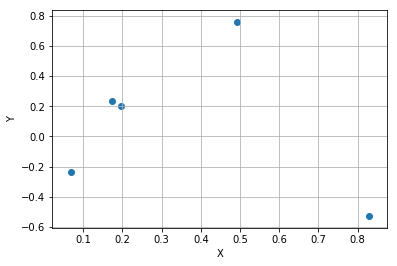

In [10]:
############# 各科目を主成分負荷量から評価する
print("科目ごとの第1、第2主成分負荷量を比べてみます")
print("第1",第1主成分の主成分負荷量) 
print("第2",第2主成分の主成分負荷量) 
# 科目ごとに第1主成分負荷量をX軸、第2主成分負荷量をY軸として表示
plt.scatter(第1主成分の主成分負荷量,第2主成分の主成分負荷量) 
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()

## 19) 第1、第2の主成分得点を図示する

0 149.94 16.00
1 90.05 4.36
2 130.60 12.01
3 97.36 8.44
4 129.74 21.97
5 146.48 10.75
6 37.88 17.66
7 107.63 28.43
8 119.24 17.19
9 85.76 24.44
10 64.50 7.83
11 69.97 24.13
12 84.45 24.84
13 110.94 19.49
14 91.66 13.20
15 64.16 7.76
16 76.24 14.91
17 107.48 15.63
18 136.32 12.22
19 99.09 7.78


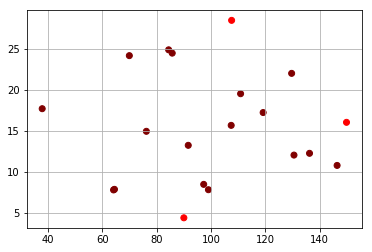

In [13]:
############ 各受験者を、主成分得点から評価する
受験者ごとの主成分得点_第1=全受験データ.dot(第1主成分の主成分負荷量.T).flatten()
受験者ごとの主成分得点_第2=全受験データ.dot(第2主成分の主成分負荷量.T).flatten()

for 受験番号 in range(受験者数):
    print(受験番号,'{0:.2f}'.format(受験者ごとの主成分得点_第1[受験番号]),'{0:.2f}'.format(受験者ごとの主成分得点_第2[受験番号]))
    
y=[0.5,0.5,1,1,1,1,1,0.5,1,1,1,1,1,1,1,1,1,1,1,1] # 色の配列(特定の受験者の色を変えて目立たせるため)
plt.scatter(受験者ごとの主成分得点_第1,受験者ごとの主成分得点_第2, vmin=-1, vmax=1, c=y, cmap=cm.seismic)
plt.grid(True)
plt.show()

## 任意課題(1) 
寄与率を「第5主成分まで」求めてください。その際、5次元から2次元に落としていると「第3、第4、第5」主成分は求められません。プログラムのどこを変更したらよいか考えましょう。

## 任意課題(2)
累積寄与率が「第1主成分から第5主成分まで」上昇していく様子を図示してください。どのように上がり、最終的にはどのような値になるでしょうか?

In [17]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.cm as cm # 図示の時の色関係
plt.figure(figsize = (8, 6)) # 図示の準備

# 各列は数学、理科、社会、英語、国語の順
全受験データ=np.array([[71,64,83,100,71],[34,48,67,57,68],[58,59,78,87,66],[41,51,70,60,72],[69,56,74,81,66],[64,65,82,100,71],[16,45,63,7,59],[59,59,78,59,62],[57,54,84,73,72],[46,54,71,43,62],[23,49,64,33,70],[39,48,71,29,66],[46,55,68,42,61],[52,56,82,67,60],[39,53,78,52,72],[23,43,63,35,59],[37,45,67,39,70],[52,51,74,65,69],[63,56,79,91,70],[39,49,73,64,60]])
np.set_printoptions(precision=5) # 小数点以下の桁数
受験者数=全受験データ.shape[0] # 全受験データの行数が受験者数である
pca=PCA(n_components=5) # PCAのインスタンスを作る(2次元に落とす)
pca.fit(全受験データ) # 主成分分析(教師なし学習)

# 各主成分負荷量
print("各主成分負荷量")
print(pca.components_[[0],:])
print(pca.components_[[1],:])
print(pca.components_[[2],:])
print(pca.components_[[3],:])
print(pca.components_[[4],:])

print("各寄与率")
print('{0:.5f}'.format(pca.explained_variance_ratio_[0]))
print('{0:.5f}'.format(pca.explained_variance_ratio_[1]))
print('{0:.5f}'.format(pca.explained_variance_ratio_[2]))
print('{0:.5f}'.format(pca.explained_variance_ratio_[3]))
print('{0:.5f}'.format(pca.explained_variance_ratio_[4]))

# 主成分負荷量 = -1*pca.components_[[0],:] # 第1主成分のみ
# 受験者ごとの主成分得点=全受験データ.dot(主成分負荷量.T)

各主成分負荷量
[[-0.49151 -0.17305 -0.19589 -0.82782 -0.06941]]
[[ 0.75599  0.23784  0.19864 -0.52574 -0.23677]]
[[-0.10648  0.0131  -0.22762  0.19385 -0.94821]]
[[ 0.39445 -0.34926 -0.83517  0.02334  0.15613]]
[[-0.1413   0.88957 -0.41576 -0.01417  0.12507]]
各寄与率
0.91425
0.04751
0.01841
0.01272
0.00710


<Figure size 576x432 with 0 Axes>

第9回第4章の演習はここまでです。お疲れさまでした。